# LLM based Generative AI 

* Retrieval Augmented Generation (RAG)
* Finetuing pre-trained LLM
* Langchain

Ref. https://towardsdatascience.com/rag-vs-finetuning-which-is-the-best-tool-to-boost-your-llm-application-94654b1eaba7

## RAG
This approach integrates the power of retrieval (or searching) into LLM text generation. It combines a retriever system, which fetches relevant document snippets from a large corpus, and an LLM, which produces answers using the information from those snippets. In essence, RAG helps the model to “look up” external information to improve its responses.

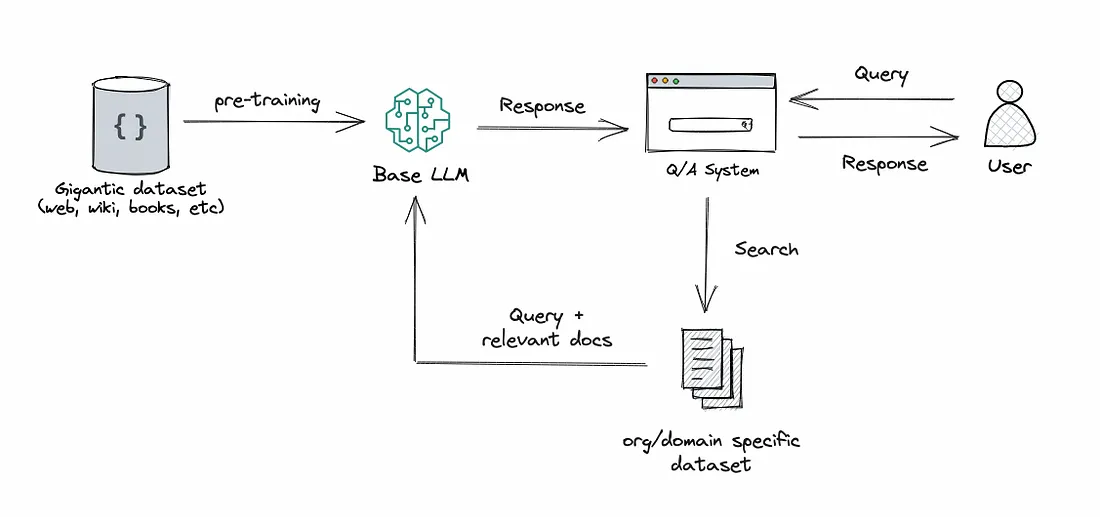

# Finetuning
This is the process of taking a pre-trained LLM and further training it on a smaller, specific dataset to adapt it for a particular task or to improve its performance. By finetuning, we are adjusting the model’s weights based on our data, making it more tailored to our application’s unique needs.

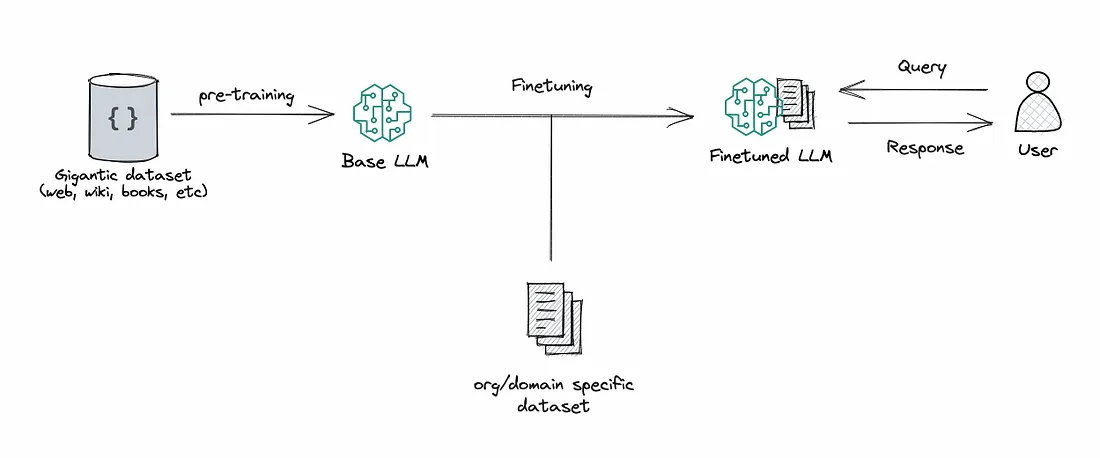

In [105]:
#pip install langchain-community langchain-core

In [1]:
from langchain.embeddings import LlamaCppEmbeddings
from langchain.callbacks.manager import CallbackManager
from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler
#from langchain_community.embeddings.llamacpp import LlamaCppEmbeddings
from langchain_community.llms.llamacpp import LlamaCpp

# LLM inference is slow on CPU and a bto faster in GPU 

In [2]:
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()]) #stream out response can help user stay engaged

In [13]:
llama_2_13b = LlamaCppEmbeddings(
    model_path='../llama-2-7b-chat.Q3_K_M.gguf', #your path to 8-bit quantized gguf model 
    n_ctx=1024,
    encode_kwargs = {'normalize_embeddings': 'True'},
    #callback_manager=callback_manager,
    verbose=True,
    )

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from ../llama-2-7b-chat.Q3_K_M.gguf (version GGUF V2)
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = LLaMA v2
llama_model_loader: - kv   2:                       llama.context_length u32              = 4096
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 11008
llama_model_loader: - kv   6:                 llama.rope.dimension_count u32              = 128
llama_model_loader: - kv   7:                 llama.attention.head_count u32             

ValidationError: 1 validation error for LlamaCppEmbeddings
encode_kwargs
  extra fields not permitted (type=value_error.extra)

In [16]:
LlamaCppEmbeddings()

KeyError: 'model_path'

In [4]:
gww = '''Gone with the Wind is a 1939 American epic historical romance film adapted from the 1936 novel by Margaret Mitchell. The film was produced by David O. Selznick of Selznick International Pictures and directed by Victor Fleming. Set in the American South against the backdrop of the Civil War and the Reconstruction era, the film tells the story of Scarlett O'Hara (Vivien Leigh), the strong-willed daughter of a Georgia plantation owner, following her romantic pursuit of Ashley Wilkes (Leslie Howard), who is married to his cousin, Melanie Hamilton (Olivia de Havilland), and her subsequent marriage to Rhett Butler (Clark Gable).
The film had a troubled production. The start of filming was delayed for two years until January 1939 because of Selznick's determination to secure Gable for the role of Rhett, and concluded in July. The role of Scarlett was difficult to cast, and 1,400 unknown women were interviewed for the part. Sidney Howard's original screenplay underwent many revisions by several writers to reduce it to a suitable length. The original director, George Cukor, was fired shortly after filming began, and was replaced by Fleming, who in turn was briefly replaced by Sam Wood while taking some time off due to exhaustion. Post-production concluded in November 1939, just a month before its premiere.
It received generally positive reviews upon its release on December 15, 1939. While the casting was widely praised, the long running time received criticism. At the 12th Academy Awards, Gone with the Wind received ten Academy Awards (eight competitive, two honorary) from thirteen nominations, including wins for Best Picture, Best Director (Fleming), Best Adapted Screenplay (posthumously awarded to Sidney Howard), Best Actress (Leigh), and Best Supporting Actress (Hattie McDaniel, becoming the first African American to win an Academy Award). It set records for the total number of wins and nominations at the time.
Gone with the Wind was immensely popular when first released. It became the highest-earning film made up to that point, and held the record for over a quarter of a century. When adjusted for monetary inflation, it is still the highest-grossing film in history. It was re-released periodically throughout the 20th century and became ingrained in popular culture. Although the film has been criticized as historical negationism, glorifying slavery and the Lost Cause of the Confederacy myth, it has been credited with triggering changes in the way in which African Americans were depicted cinematically. Gone with the Wind is regarded as one of the greatest films of all time, and in 1989 became one of the twenty-five inaugural films selected for preservation in the United States National Film Registry.'''

In [6]:
documents = [gww]
gww_output = llama_2_13b.encode_queries(documents)

RuntimeError: Failed to get embeddings from sequence pooling type is not set

In [ ]:
gww_output.shape

In [ ]:
len(gww_output[0])

# Test llama_index.core index - 
https://docs.llamaindex.ai/en/stable/understanding/querying/querying.html

In [127]:
#!pip install llama-index-llms-llama-cpp

In [9]:
from llama_index.llms.llama_cpp import LlamaCPP
from llama_index.llms.llama_cpp.llama_utils import messages_to_prompt, completion_to_prompt

In [56]:
llm = LlamaCPP(
    # You can pass in the URL to a GGML model to download it automatically
    model_url=None,
    # optionally, you can set the path to a pre-downloaded model instead of model_url
    model_path='./llama-2-13b-chat.Q8_0.gguf',
    temperature=0.1,
    max_new_tokens=512,
    # llama2 has a context window of 4096 tokens, but we set it lower to allow for some wiggle room
    context_window=3900,
    # kwargs to pass to __call__()
    generate_kwargs={},
    # kwargs to pass to __init__()
    # set to at least 1 to use GPU
    model_kwargs={"n_gpu_layers": 1},
    # transform inputs into Llama2 format
    messages_to_prompt=messages_to_prompt,
    completion_to_prompt=completion_to_prompt,
    verbose=False,
)

In [104]:
%%time

for chunk in llm.stream_complete("Will generative AI be replacing the programmer job?"):
    print(chunk.delta, end="", flush=True)



Generative AI is a type of artificial intelligence that can generate new and original content, such as images, videos, music, and text. It has the potential to revolutionize many industries, including the tech industry. However, there is a concern that generative AI could replace human programmers, leading to job loss and unemployment. In this article, we will explore the possibility of generative AI replacing programmers and what the future holds for the tech industry.

Can Generative AI Replace Programmers?

Generative AI has made significant progress in recent years, and it has the potential to automate many tasks that are currently performed by human programmers. For example, generative AI can be used to write code, create software, and develop applications. However, it is important to note that generative AI is not yet at a level where it can fully replace human programmers.

There are several reasons why generative AI cannot fully replace human programmers:

1. Creativity: Prog

# Join Effort of LangChain and Llama Index
* https://docs.llamaindex.ai/en/latest/examples/llm/llama_2_llama_cpp.html

In [11]:
from llama_index.llms.llama_cpp import LlamaCPP

In [12]:
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex
from llama_index.llms.llama_cpp import LlamaCPP
from llama_index.llms.llama_cpp.llama_utils import (
    messages_to_prompt,
    completion_to_prompt,
)

In [13]:
%%time

#use compressed llama-2-7b f16 model for Q&A
for chunk in llm.stream_complete("Tell me something about llama-2 large language model?"):
    print(chunk.delta, end="", flush=True)

  Sure, I'd be happy to help! Llama-2 is a large language model developed by Meta AI that is trained on a massive dataset of text from the internet. It is designed to generate human-like text based on the input it receives, and it can be used for a variety of tasks such as answering questions, generating text summaries, and even creating new text.

One of the key features of Llama-2 is its ability to generate text that is contextually appropriate and coherent. This means that it can understand the context of the input it receives and generate text that is relevant and appropriate for that context. For example, if you were to ask Llama-2 a question about a specific topic, it could generate an answer that is relevant to that topic and written in a style that is similar to how a human would write.

Llama-2 is also capable of generating text that is diverse and creative. It can generate text that is different from the input it receives, and it can even generate text that is humorous or sar


llama_print_timings:        load time =    7041.71 ms
llama_print_timings:      sample time =      87.14 ms /   300 runs   (    0.29 ms per token,  3442.66 tokens per second)
llama_print_timings: prompt eval time =    7041.61 ms /    77 tokens (   91.45 ms per token,    10.93 tokens per second)
llama_print_timings:        eval time =  103021.28 ms /   299 runs   (  344.55 ms per token,     2.90 tokens per second)
llama_print_timings:       total time =  110876.75 ms /   376 tokens


CPU times: user 10min 53s, sys: 1.91 s, total: 10min 55s
Wall time: 1min 50s


# Query engine set up with LlamaCPP

In [ ]:
# # #https://huggingface.co/docs/transformers/en/model_doc/llama2
# !python convert_llama_weights_to_hf.py --input_dir ./llama-2-7b --model_size 7B --output_dir ./llama-2-7b

In [14]:
from llama_index.core import set_global_tokenizer
from transformers import AutoTokenizer

set_global_tokenizer(
    AutoTokenizer.from_pretrained("NousResearch/Llama-2-13b-chat-hf").encode
)

In [15]:
# use Huggingface embedding to define a embedding model
from llama_index.embeddings.huggingface import HuggingFaceEmbedding
from llama_index.core import SimpleDirectoryReader, VectorStoreIndex

embed_model = HuggingFaceEmbedding(model_name="BAAI/bge-small-en-v1.5") #https://huggingface.co/BAAI/bge-small-en-v1.5 or BAAI/bge-large-en

# load Whole Foods Market SEC filings

In [16]:
# load documents
documents = SimpleDirectoryReader("../ECON5350/Innovation_Whole_Foods_Market/txt/").load_data() #use recursive=True, there is sub-directory if

In [36]:
len(documents)

29

In [17]:
documents[1]

Document(id_='4c2ebf78-528f-4a40-bca0-dcd50205dd75', embedding=None, metadata={'file_path': '/home/dada/Barn/GQ/llama2/../ECON5350/Innovation_Whole_Foods_Market/txt/10-K-1997-12-29-1997-09-28.txt', 'file_name': '10-K-1997-12-29-1997-09-28.txt', 'file_type': 'text/plain', 'file_size': 1094, 'creation_date': '2024-03-13', 'last_modified_date': '2024-03-13'}, excluded_embed_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], excluded_llm_metadata_keys=['file_name', 'file_type', 'file_size', 'creation_date', 'last_modified_date', 'last_accessed_date'], relationships={}, text="EDGAR Filing Documents for 0001010549-97-000297This page uses Javascript. Your browser either doesn't support Javascript or you have it turned off. To see this page as it is meant to appear please use a Javascript enabled browser.Home|Latest Filings|Previous PageSearch the Next-Generation EDGAR SystemFiling DetailSEC Home»Search the Next-Generation EDGAR 

# semantic split documents into smaller nodes

In [18]:
from llama_index.core.node_parser import SentenceSplitter, SemanticSplitterNodeParser
splitter = SemanticSplitterNodeParser(buffer_size=1, breakpoint_percentile_threshold=95, embed_model=embed_model)

In [19]:
semant_nodes = splitter.get_nodes_from_documents(documents)

In [20]:
len(semant_nodes)

976

In [21]:
print(semant_nodes[7].get_content())

:TX| Fiscal Year End:0929Type:10-K| Act:34| File No.:000-19797| Film No.:99779435SIC:5411Retail-Grocery StoresOffice of Trade & Services


# create query engine 

In [22]:
vector_index = VectorStoreIndex(semant_nodes, embed_model=embed_model)
query_engine = vector_index.as_query_engine(llm=llm, streaming=True) #by default, it will only give you 2 nodes with highest similarity

In [23]:
response = query_engine.query("Tell me somthing about whole foods market")

In [24]:
from llama_index.core.response.notebook_utils import display_source_node

In [34]:
node_text = []
for n in response.source_nodes:    
    display_source_node(n, source_length=20000)

**Node ID:** 7530c513-6a28-4723-885b-72fdb6183ff2<br>**Similarity:** 0.8190865634771294<br>**Text:** Business Whole Foods Market, Inc. owns and operates the country's largest chain of natural foods supermarkets. Our Company mission is to improve the health, well- being, and healing of both people and of the planet. To achieve this mission, we plan to continue to expand our retail operations to offer the highest quality and most nutritious foods to more and more customers, helping them to live healthier and more vital lives. Through our growth, we have had a large and positive impact on the natural and organic foods movement throughout the United States, helping lead the industry to nationwide acceptance over the last twenty years. We opened our first store in Austin, Texas in 1980 and as of September 24, 2000, we operated 117 stores in 22 states plus the District of Columbia. Our sales have grown rapidly through internal expansion, acquisitions and same store sales growth, from approximately $92.5 million in fiscal year 1991 to approximately $1.8 billion in fiscal year 2000, a compounded annual growth rate of approximately 39%. Our stores currently average approximately 27,000 square feet in size and approximately $17 million in annual sales. Sales per gross square foot as of our most recent fiscal year end was approximately $660, which we believe is higher than most conventional supermarkets or food retailers, including competitors in the large-store segment of the natural foods industry. Our stores are supported by regional distribution centers, bake houses, commissary kitchens, a seafood processing facility, a produce procurement and field inspection office, and a coffee roasting operation. We have the goal of becoming a national brand synonymous with not just natural and organic foods, but with being the best supermarket in every community in which we are located. In fiscal year 2000, we merged Amrion, our direct marketing and nutritional supplement manufacturing subsidiary, and WholeFoods.com, our Internet business, to form WholePeople.com. In June 2000, WholePeople.com's Internet properties were merged into Gaiam.com in exchange for common stock in Gaiam.com and the remaining business was renamed NatureSmart. Subsequent to the end of the current fiscal year, our Board of Directors adopted a plan to discontinue the business of manufacturing and direct marketing of nutritional supplements at NatureSmart. The Natural Products Industry According to a leading trade publication for the industry, natural products sales have grown to over $28 billion in 1999, increasing 11% for the second year in a row. The natural products we offer in our stores include: .<br>

**Node ID:** f8163d21-fa53-44e4-a0f9-c574045fea91<br>**Similarity:** 0.8188134783722647<br>**Text:** Our Company mission is to promote vitality and well-being for all individuals by supplying the highest quality, most wholesome foods available. Since the purity of our food and the health of our bodies are directly related to the purity and health of our environment, our core mission is devoted to the promotion of organically grown foods, food safety concern and sustainability of our entire eco-system. Through our growth, we have had a large and positive impact on the natural and organic foods movement throughout the United States, helping lead the industry to nationwide acceptance over the last 24 years.Whole Foods Market, Inc. is a Texas corporation incorporated in 1980. Whole Foods Market is based in Austin, Texas and conducts business through various wholly-owned subsidiaries. Unless otherwise specified, references in this Report to Whole Foods Market or the Company include its consolidated subsidiaries. We operate in one reportable segment, natural and organic foods supermarkets.We opened our first store in Austin, Texas in 1980. As of September 26, 2004, we operated 163 stores: 154 stores in 28 U.S. states and the District of Columbia; two stores in Canada; and seven stores in the United Kingdom. Our sales have grown rapidly through new store openings, acquisitions and comparable store sales growth, from approximately $92 million in fiscal year 1991, excluding the effect of pooling-of-interests transactions completed since 1991, to approximately $3.9 billion in fiscal year 2004, a compounded annual growth rate of approximately 33%. Our stores average approximately 32,000 square feet in size and approximately $25 million in annual sales. Our stores are supported by regional distribution centers, bakehouse facilities, commissary kitchens, seafood-processing facilities, produce procurement centers and a coffee roasting operation.Our goal is to become an international brand synonymous with not just natural and organic foods, but with being the best food retailer in every community in which we are located. We believe our heavy emphasis on perishable products is helping us reach that goal, differentiating our stores from conventional supermarkets and enabling us to attract a broader customer base. Perishable product sales accounted for approximately 67% of our total retail sales in fiscal year 2004. We believe that all shoppers, not just natural and organic food shoppers, appreciate great produce, dairy, meat, seafood, bakery and prepared foods, and it is our strength of execution in perishables that has attracted many of our most loyal customers.The Natural Products IndustryAccording to a leading trade publication for the industry, sales of natural products across all channels grew to over $43 billion in 2003, an 8% increase over the prior year. The natural and organic products we offer in our stores include food and beverages, dietary supplements, personal care products, household goods, and related educational products. We believe that sales growth for natural and organic foods is being driven by numerous factors, including:•heightened awareness of the role that food and nutrition play in long-term health, which has led to healthier eating patterns;•a better-educated populace whose median age is increasing each year;•increasing consumer concern over the purity and safety of food due to the presence of pesticide residues, growth hormones, artificial ingredients and other chemicals, and genetically engineered ingredients; and•environmental concerns due to the degradation of water and soil quality.3Table of ContentsNatural foods can be defined as foods that are minimally processed, largely or completely free of artificial ingredients, preservatives and other non-naturally occurring chemicals and as near to their whole, natural state as possible. Organic products are grown through methods intended to support and enhance the earth’s natural balance. Generally, organic food products are produced using:•agricultural management practices intended to promote and enhance eco-system health;•no genetically-engineered seeds or crops, sewage sludge, long-lasting pesticides, herbicides or fungicides;•livestock management practices intended to promote healthy, humanely treated animals by providing organically-grown feed, fresh air and outdoor access while using no antibiotics or growth hormones; and•food processing practices intended to protect the integrity of the organic product and disallow irradiation, genetically modified organisms (“GMOs”) or synthetic preservatives.Organic RuleOn October 21, 2002, the United States Department of Agriculture’s (“USDA”) Organic Rule was implemented into Federal law. The Organic Rule was created to address the rapid, consistent growth of the organics industry over the past 20-plus years and the need for a set of national organic standards to serve as clear guidelines as to what is considered organic for the industry and its customers. Under the Organic Rule, all products labeled as “organic” in any form must now be certified by a USDA-accredited certifying agency. Furthermore, retailers, including Whole Foods Market, which handle, store, and sell organic products must implement measures to protect their organic integrity by:•preventing the commingling of organic and conventional products;•protecting organic products from contact with prohibited substances (such as sanitation and pest control products);•labeling organic products properly and clearly; and•keeping proper records with regard to organic handling procedures and vendor relationships.Whole Foods Market has taken an active leadership role in the development of the national organic standards. Margaret Wittenberg, our Vice President of Marketing and Public Affairs, served on the National Organic Standards Board (NOSB) from 1995 to 2000. The NOSB members were appointed by the Secretary of Agriculture to act as industry advisors to the USDA’s National Organic Program, developing the standards and protocols that form the backbone of the USDA’s Organic Rule. As the sole retail representative on the NOSB, Ms. Wittenberg contributed a broad, realistic perspective on how the standards could work most effectively at the retail level.Whole Foods Market has been devoted to protecting organic integrity for years, and we are pleased to have the USDA’s Organic Rule as a guiding standard. In May of 2003, Whole Foods Market became America’s first national “Certified Organic” grocer through certification from Quality Assurance International (“QAI”), a federally recognized independent third-party certification organization. This voluntary certification tells our customers that we have gone the extra mile by not only following the USDA’s Organic Rule, but following a strict set of operating procedures designed to ensure that the products we sell and label as organic are indeed organic – procedures that are not specifically required by the Organic Rule.QAI’s Organic Certification Program for Retailers verifies businesses handle organic goods according to stringent national guidelines, from receipt through re-packing to final sale to customers. To receive certification, retailers must agree to adhere to a strict set of standards set forth by the USDA, submit documentation, and open their facilities to on-site inspections – all designed to assure Americans that the chain of organic integrity is preserved. The certification is one more example of our commitment to the promotion of organic agriculture and the integrity of the certified organic label. Based on QAI’s annual review of our operating procedures, including inspections of our stores and warehouses, our certification is extended through July 2005.Business StrategyWhole Foods Market is the largest retailer of natural and organic products. We believe that much of our success to date is because we remain a uniquely mission-driven company.<br>

In [101]:
response_text = response.source_nodes[0].get_text()
response_text

"Business Whole Foods Market, Inc. owns and operates the country's largest chain of natural foods supermarkets. Our Company mission is to improve the health, well- being, and healing of both people and of the planet. To achieve this mission, we plan to continue to expand our retail operations to offer the highest quality and most nutritious foods to more and more customers, helping them to live healthier and more vital lives. Through our growth, we have had a large and positive impact on the natural and organic foods movement throughout the United States, helping lead the industry to nationwide acceptance over the last twenty years. We opened our first store in Austin, Texas in 1980 and as of September 24, 2000, we operated 117 stores in 22 states plus the District of Columbia. Our sales have grown rapidly through internal expansion, acquisitions and same store sales growth, from approximately $92.5 million in fiscal year 1991 to approximately $1.8 billion in fiscal year 2000, a compou

In [100]:
from langchain_core.prompts import PromptTemplate
from langchain_community.llms import LlamaCpp
# from langchain.chains import LLMChain
# from langchain.callbacks.manager import CallbackManager
# from langchain.callbacks.streaming_stdout import StreamingStdOutCallbackHandler

In [98]:
llm = LlamaCPP(
    # You can pass in the URL to a GGML model to download it automatically
    model_path='./llama-2-13b-chat.Q8_0.gguf',
    temperature=0.1,
    context_window=1024,
    # kwargs to pass to __call__()
    model_kwargs={"n_gpu_layers": 1},
    # transform inputs into Llama2 format
    verbose=False,
)

In [102]:
prompt_summarize = f"""
    Write a concise summary of the text as ```{response_text}```
    SUMMARY:
    """

In [103]:
for chunk in llm.stream_complete(prompt_summarize):
    print(chunk.delta, end="", flush=True)


    * Whole Foods Market is a leading retailer of natural and organic foods in the US.
    * The company has experienced rapid growth in sales and store count over the past two decades.
    * The company has a strong focus on providing high-quality and nutritious foods to its customers.
    * The company has a national presence with stores in 22 states and the District of Columbia.
    * The company has a diverse range of products, including fresh produce, meat, seafood, baked goods, and prepared foods.
    * The company has a strong commitment to sustainability and supporting local communities.
    * The company has a goal of becoming a national brand synonymous with high-quality and nutritious foods.

In [97]:
prompt_5_bullets = f"""
    Write a concise summary of the text, return your responses with 5 lines that cover the key points of the text.
    ```{response_text}```
    SUMMARY:
    """

In [99]:
for chunk in llm.stream_complete(prompt_5_bullets):
    print(chunk.delta, end="", flush=True)

1. Whole Foods Market is a leading retailer of natural and organic foods in the US.
    2. The company has experienced rapid growth in sales and store count over the past two decades.
    3. The company has a strong focus on providing high-quality and nutritious foods to its customers.
    4. The company has a large and positive impact on the natural and organic foods movement in the US.
    5. The company plans to continue expanding its retail operations and become a national brand synonymous with being the best supermarket in every community it serves.

# save index 

In [47]:
# persist index to disk (under ./storage)
vector_index.storage_context.persist("./storage")

In [49]:
from llama_index.core.storage.storage_context import StorageContext

In [50]:
# rebuild storage context
storage_context = StorageContext.from_defaults(persist_dir="./storage")

In [ ]:
# load index
return_index = load_index_from_storage(storage_context, embed_model=embed_model)

# Repeat the above model inference

# load pdf as inputs

In [2]:
#!pip install pypdf -q

In [ ]:
#for PDF file we need to import PyPDFLoader from langchain framework
from langchain_community.document_loaders import PyPDFLoader

# for CSV file we need to import csv_loader
# for Doc we need to import UnstructuredWordDocumentLoader
# for Text document we need to import TextLoader

filePath = "/content/A_miniature_version_of_the_course_can_be_found_here__1701743458.pdf"
loader = PyPDFLoader(filePath) 
#Load document 
pages = loader.load_and_split()
print(pages[0].page_content)

# Embedding Model: Chunk size determines what embedding models should be used

* Small chunk size : Example: Single Sentence → Low contextual information for generation.
* Large chunk size : Example: Full Page, multiple paragraphs, full document. 
* Normalize Whitespace - Ensure consistent spacing between words

In this case, chunks cover more information, which could increase the effectiveness of generation with more context.

In [ ]:
text = "..." # your text

from langchain.text_splitter import CharacterTextSplitter
text_splitter = CharacterTextSplitter(
    separator = "\n\n",
    chunk_size = 256,
    chunk_overlap  = 20
)

docs = text_splitter.create_documents([text])

In [ ]:
text = "..." # your text
from langchain.text_splitter import NLTKTextSplitter
text_splitter = NLTKTextSplitter()
docs = text_splitter.split_text(text)

In [ ]:
text = "..." # your text
from langchain.text_splitter import SpacyTextSplitter
text_splitter = SpaCyTextSplitter()
docs = text_splitter.split_text(text)

In [ ]:
text = "..." # your text
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    # Set a really small chunk size, just to show.
    chunk_size = 256,
    chunk_overlap  = 20
)
docs = text_splitter.create_documents([text])

In [ ]:
from langchain.text_splitter import MarkdownTextSplitter
markdown_text = "..."
markdown_splitter = MarkdownTextSplitter(chunk_size=100, chunk_overlap=0)
docs = markdown_splitter.create_documents([markdown_text])markdown_splitter = MarkdownTextSplitter(chunk_size=100, chunk_overlap=0)
docs = markdown_splitter.create_documents([markdown_text])

In [ ]:
from langchain.text_splitter import LatexTextSplitter
latex_text = "..."
latex_splitter = LatexTextSplitter(chunk_size=100, chunk_overlap=0)
docs = latex_splitter.create_documents([latex_text])

# Vector DB - https://github.com/lancedb/lancedb